In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
import sklearn
import warnings 
warnings.filterwarnings(action='ignore')
plt.style.use('dark_background')

In [2]:
data = pd.read_csv('Raw_Housing_Prices.csv')

In [3]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [4]:
# target varible = Sale Price 

In [5]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21604 non-null  float64
 6   Lot Area (in Sqft)                         21604 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [7]:
data.shape

(21613, 21)

(21609,)


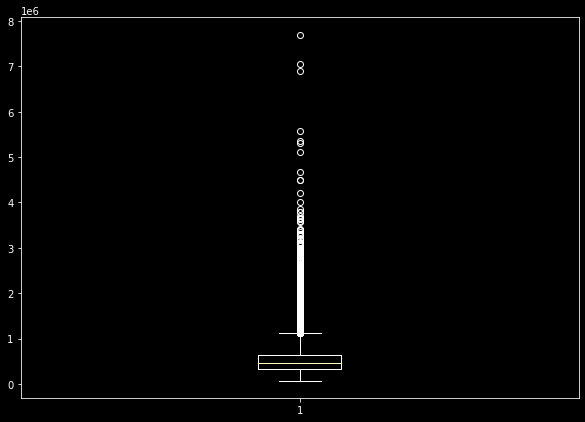

In [8]:
# plotting whisker/boxplot for sale Price
sale_price = data['Sale Price']
sale_price.dropna(how='any',inplace=True)
print(sale_price.shape)
fig = plt.figure(figsize =(10, 7))
plt.boxplot(sale_price)
plt.show()

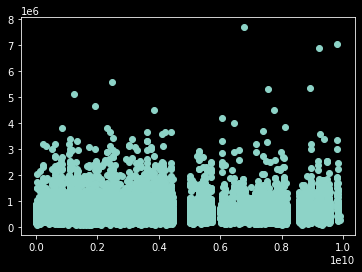

In [9]:
plt.scatter(x=data['ID'],y=data['Sale Price'])

<AxesSubplot:xlabel='Sale Price'>

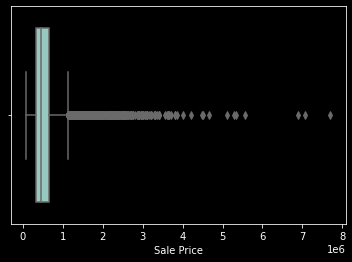

In [10]:
import seaborn as sns
sns.boxplot(x=data['Sale Price'])

In [11]:
# treating outliers in sale price 
q1 = data['Sale Price'].quantile(0.25)
q3 = data['Sale Price'].quantile(0.75)
q1,q3

(321950.0, 645000.0)

In [12]:
iqr = q3-q1
iqr

323050.0

In [13]:
upper_limit = q3 +1.5*iqr
lower_limit = q1 - 1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [14]:
def imputing_outliers(value):
    if value > upper_limit :
        return upper_limit
    elif value<lower_limit :
        return lower_limit
    return value
data['Sale Price']=data['Sale Price'].apply(imputing_outliers)

In [15]:
data['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

<AxesSubplot:ylabel='Frequency'>

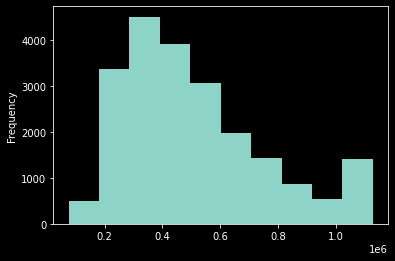

In [16]:
data['Sale Price'].plot.hist()

In [17]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              4
Flat Area (in Sqft)                          9
Lot Area (in Sqft)                           9
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    3
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     1
Longitude                                    1
Living Area after Renovation (in Sqft)       1
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [19]:
data.columns

Index(['ID', 'Date House was Sold', 'Sale Price', 'No of Bedrooms',
       'No of Bathrooms', 'Flat Area (in Sqft)', 'Lot Area (in Sqft)',
       'No of Floors', 'Waterfront View', 'No of Times Visited',
       'Condition of the House', 'Overall Grade',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Renovated Year', 'Zipcode', 'Latitude',
       'Longitude', 'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)'],
      dtype='object')

In [20]:
#isolating numerical variables
numerical_columns = ['No of Bathrooms', 'Flat Area (in Sqft)','Lot Area (in Sqft)',
                     'Area of the House from Basement (in Sqft)','Latitude',
                     'Longitude','Living Area after Renovation (in Sqft)']

In [21]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(missing_values=np.nan ,strategy = 'median')
data[numerical_columns] = imputer.fit_transform(data[numerical_columns])

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21613 non-null  int64  
 1   Date House was Sold                        21613 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21613 non-null  int64  
 4   No of Bathrooms                            21613 non-null  float64
 5   Flat Area (in Sqft)                        21613 non-null  float64
 6   Lot Area (in Sqft)                         21613 non-null  float64
 7   No of Floors                               21613 non-null  float64
 8   Waterfront View                            21613 non-null  object 
 9   No of Times Visited                        21613 non-null  object 
 10  Condition of the House

In [23]:
len(data)

21613

In [24]:
data.isnull().sum()

ID                                           0
Date House was Sold                          0
Sale Price                                   4
No of Bedrooms                               0
No of Bathrooms                              0
Flat Area (in Sqft)                          0
Lot Area (in Sqft)                           0
No of Floors                                 0
Waterfront View                              0
No of Times Visited                          0
Condition of the House                       0
Overall Grade                                0
Area of the House from Basement (in Sqft)    0
Basement Area (in Sqft)                      0
Age of House (in Years)                      0
Renovated Year                               0
Zipcode                                      1
Latitude                                     0
Longitude                                    0
Living Area after Renovation (in Sqft)       0
Lot Area after Renovation (in Sqft)          0
dtype: int64

In [26]:
data = data.dropna(axis=0,subset=['Sale Price'])

In [27]:
len(data)

21609

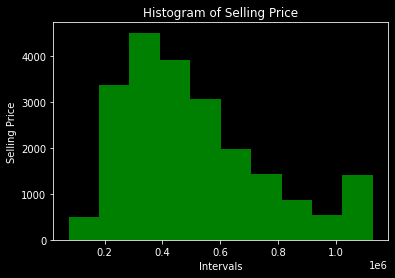

In [28]:
plt.hist(data1['Sale Price'],bins=10,color='green')
plt.xlabel('Intervals')
plt.ylabel( "Selling Price")
plt.title('Histogram of Selling Price')
plt.show()

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [35]:
#in zipcode there is one missing values so we have to replace it with most frequent used zipcode using simple imputer
imputer = SimpleImputer(missing_values =np.nan , strategy='most_frequent')
data['Zipcode']=imputer.fit_transform(data['Zipcode'].values.reshape(-1,1))

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        21609 non-null  object 
 10  Condition of the House

In [37]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,None,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,None,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,None,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,None,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,None,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [38]:
data['Waterfront View'] = np.where(data['Waterfront View'] =='Yes',1,0)

In [39]:
data['No of Times Visited'].unique()

array(['None', 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [40]:
mapp = {
    'None':'0',
    'Once':'1',
    'Twice':'2',
    'Thrice':'3',
    'Four':'4'
}
data['No of Times Visited']  = data['No of Times Visited'].map(mapp)

In [41]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [42]:
data['Ever Renovated']= np.where(data['Renovated Year']==0 ,'No','Yes')

In [45]:
data['Purchase Year'] = pd.DatetimeIndex(data['Date House was Sold']).year

In [46]:
data['Years Since Renovation'] = np.where(data['Ever Renovated'] == 'Yes',
                                                     abs(data['Purchase Year'] - 
                                                        data['Renovated Year']), 0)

In [47]:
data.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Purachase Year,Purchase Year,Years Since Renovation
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,...,0,98178.0,47.5112,-122.257,1340.0,5650,No,2017,2017,0
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,...,1991,98125.0,47.7210,-122.319,1690.0,7639,Yes,2017,2017,26
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,0,0,...,0,98028.0,47.7379,-122.233,2720.0,8062,No,2016,2016,0
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,...,0,98136.0,47.5208,-122.393,1360.0,5000,No,2017,2017,0
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,...,0,98074.0,47.6168,-122.045,1800.0,7503,No,2016,2016,0


In [49]:
# dropping redundant variables
data.drop( columns = ['Purchase Year', 'Date House was Sold', 'Renovated Year'], inplace = True)

In [57]:
data.drop(columns=['Purachase Year'],inplace=True)

In [58]:
data.drop(columns=['ID'],inplace=True)

In [59]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,Fair,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,Fair,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,Fair,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,Excellent,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,Fair,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [61]:
data['Condition of the House'].value_counts()

Fair         14028
Good          5678
Excellent     1701
Okay           172
Bad             30
Name: Condition of the House, dtype: int64

In [62]:
mapp={
    'Fair':1 ,
    'Bad':0,
    'Okay':2,
    'Good':3,
    'Excellent':4
}
data['Condition of the House'] = data['Condition of the House'].map(mapp)

In [63]:
data['Condition of the House'].value_counts()

1    14028
3     5678
4     1701
2      172
0       30
Name: Condition of the House, dtype: int64

In [64]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,1,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,No,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,1,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,Yes,26
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,1,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,No,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,4,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,No,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,1,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,No,0


In [65]:
data['Ever Renovated'] = np.where(data['Ever Renovated']=='Yes',1,0)

In [66]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Condition of the House,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,1,7,1180.0,0,63,98178.0,47.5112,-122.257,1340.0,5650,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,1,7,2170.0,400,67,98125.0,47.7210,-122.319,1690.0,7639,1,26
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,1,6,770.0,0,85,98028.0,47.7379,-122.233,2720.0,8062,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,4,7,1050.0,910,53,98136.0,47.5208,-122.393,1360.0,5000,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,1,8,1680.0,0,31,98074.0,47.6168,-122.045,1800.0,7503,0,0


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  int32  
 7   No of Times Visited                        21609 non-null  object 
 8   Condition of the House                     21609 non-null  int64  
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

In [71]:
data['Zipcode']=data['Zipcode'].astype(object)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21609 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Sale Price                                 21609 non-null  float64
 1   No of Bedrooms                             21609 non-null  int64  
 2   No of Bathrooms                            21609 non-null  float64
 3   Flat Area (in Sqft)                        21609 non-null  float64
 4   Lot Area (in Sqft)                         21609 non-null  float64
 5   No of Floors                               21609 non-null  float64
 6   Waterfront View                            21609 non-null  int32  
 7   No of Times Visited                        21609 non-null  object 
 8   Condition of the House                     21609 non-null  int64  
 9   Overall Grade                              21609 non-null  int64  
 10  Area of the House from

In [74]:
data = pd.get_dummies(data,columns=['Condition of the House'],drop_first=True)

In [75]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation,Condition of the House_1,Condition of the House_2,Condition of the House_3,Condition of the House_4
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,7,1180.0,...,47.5112,-122.257,1340.0,5650,0,0,1,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,7,2170.0,...,47.7210,-122.319,1690.0,7639,1,26,1,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,6,770.0,...,47.7379,-122.233,2720.0,8062,0,0,1,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,7,1050.0,...,47.5208,-122.393,1360.0,5000,0,0,0,0,0,1
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,8,1680.0,...,47.6168,-122.045,1800.0,7503,0,0,1,0,0,0


In [76]:
zip_table = data.groupby('Zipcode').agg({'Sale Price':'mean'}).sort_values('Sale Price')

In [77]:
zip_table

,Sale Price
Zipcode,
98002.0,2.342840e+05
98168.0,2.403284e+05
98032.0,2.512962e+05
98001.0,2.808047e+05
98148.0,2.849086e+05
...,...
98109.0,7.876028e+05
98112.0,8.807990e+05
98040.0,9.621087e+05


In [78]:
zip_table['Zipcode_Group'] = pd.cut(zip_table['Sale Price'],bins=10,labels = ['Zipcode_Group_0',
                                                                             'Zipcode_Group_1',
                                                                             'Zipcode_Group_2',
                                                                             'Zipcode_Group_3',
                                                                             'Zipcode_Group_4',
                                                                             'Zipcode_Group_5',
                                                                             'Zipcode_Group_6',
                                                                             'Zipcode_Group_7',
                                                                             'Zipcode_Group_8',
                                                                             'Zipcode_Group_9'],include_lowest = True)

In [79]:
zip_table= zip_table.drop(columns='Sale Price')

In [80]:
data = pd.merge(data,zip_table,left_on='Zipcode',how='left',right_index=True)

In [81]:
data = data.drop(columns='Zipcode')

In [82]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft),Ever Renovated,Years Since Renovation,Condition of the House_1,Condition of the House_2,Condition of the House_3,Condition of the House_4,Zipcode_Group
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,7,1180.0,...,-122.257,1340.0,5650,0,0,1,0,0,0,Zipcode_Group_0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,7,2170.0,...,-122.319,1690.0,7639,1,26,1,0,0,0,Zipcode_Group_2
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,6,770.0,...,-122.233,2720.0,8062,0,0,1,0,0,0,Zipcode_Group_2
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,7,1050.0,...,-122.393,1360.0,5000,0,0,0,0,0,1,Zipcode_Group_3
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,8,1680.0,...,-122.045,1800.0,7503,0,0,1,0,0,0,Zipcode_Group_4


In [84]:
data=pd.get_dummies(data,columns=['Zipcode_Group'],drop_first = True)

In [85]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Condition of the House_4,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,7,2170.0,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,7,1050.0,...,1,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


In [86]:
data.to_csv('Transformed Housing Data')

In [3]:
data = pd.read_csv('Transformed Housing Data')

In [4]:
data.head()

,Unnamed: 0,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,...,Condition of the House_4,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,7,...,0,0,0,0,0,0,0,0,0,0
1,1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,7,...,0,0,1,0,0,0,0,0,0,0
2,2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,6,...,0,0,1,0,0,0,0,0,0,0
3,3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,7,...,1,0,0,1,0,0,0,0,0,0
4,4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,8,...,0,0,0,0,1,0,0,0,0,0


In [5]:
data.drop(columns=['Unnamed: 0'],inplace=True)

In [6]:
data.head()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Condition of the House_4,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,221900.0,3,1.00,1180.0,5650.0,1.0,0,0,7,1180.0,...,0,0,0,0,0,0,0,0,0,0
1,538000.0,3,2.25,2570.0,7242.0,2.0,0,0,7,2170.0,...,0,0,1,0,0,0,0,0,0,0
2,180000.0,2,1.00,770.0,10000.0,1.0,0,0,6,770.0,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960.0,5000.0,1.0,0,0,7,1050.0,...,1,0,0,1,0,0,0,0,0,0
4,510000.0,3,2.00,1680.0,8080.0,1.0,0,0,8,1680.0,...,0,0,0,0,1,0,0,0,0,0


In [7]:
X = data.drop(columns=['Sale Price'])
Y= data['Sale Price']

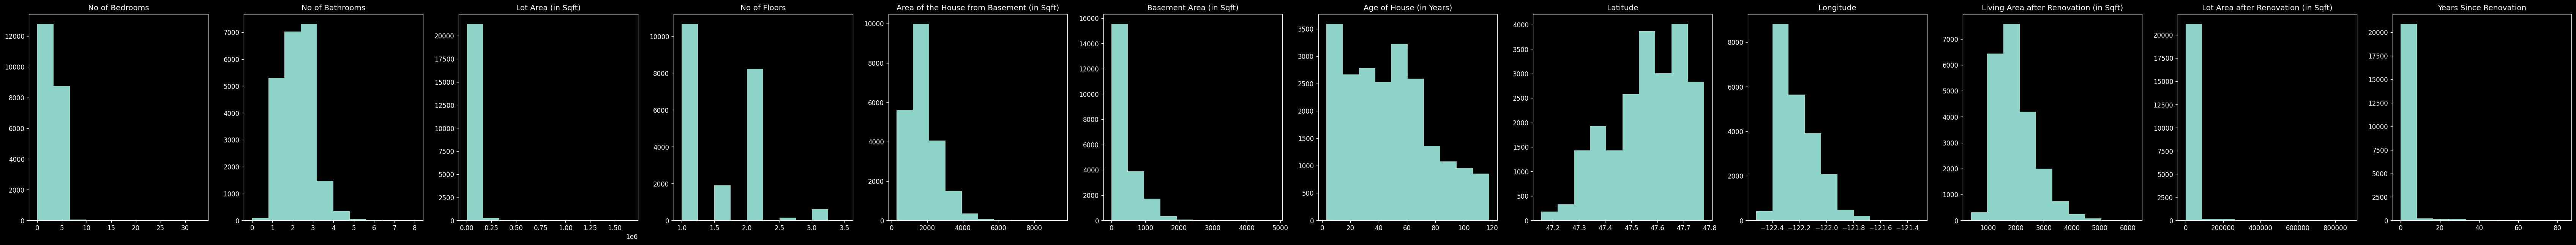

In [8]:
def distribution(data,var):
    plt.figure(figsize=(len(var)*6,6),dpi=120)
    for j , i in enumerate(var):
        plt.subplot(1,len(var),j+1)
        plt.hist(data[i])
        plt.title(i)
numerical_columns = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
       'Age of House (in Years)', 'Latitude', 'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']
for i in numerical_columns:
    X[i] = pd.to_numeric(X[i])
distribution(X, numerical_columns)

In [9]:
def right_skew(x):
  return np.log(abs(x+500))

right_skew_variables = ['No of Bedrooms', 'No of Bathrooms', 'Lot Area (in Sqft)',
       'No of Floors',
       'Area of the House from Basement (in Sqft)', 'Basement Area (in Sqft)',
        'Longitude',
       'Living Area after Renovation (in Sqft)',
       'Lot Area after Renovation (in Sqft)',
       'Years Since Renovation']

In [10]:
for i in right_skew_variables:
  X[i] = X[i].map(right_skew)

# removing infinite values
X = X.replace(np.inf, np.nan)
X.dropna(inplace=True)

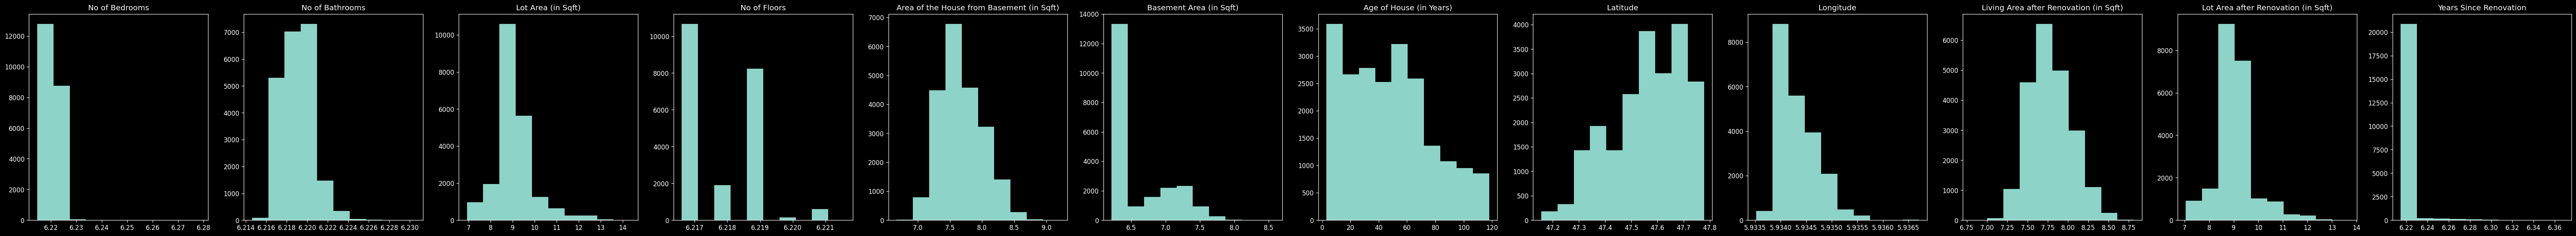

In [11]:
distribution(X, numerical_columns)

In [12]:
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Condition of the House_4,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,6.220590,6.216606,1180.0,8.724207,6.216606,0,0,7,7.426549,6.214608,...,0,0,0,0,0,0,0,0,0,0
1,6.220590,6.219098,2570.0,8.954415,6.218600,0,0,7,7.889834,6.802395,...,0,0,1,0,0,0,0,0,0,0
2,6.218600,6.216606,770.0,9.259131,6.216606,0,0,6,7.146772,6.214608,...,0,0,1,0,0,0,0,0,0,0
3,6.222576,6.220590,1960.0,8.612503,6.216606,0,0,7,7.346010,7.251345,...,1,0,0,1,0,0,0,0,0,0
4,6.220590,6.218600,1680.0,9.057189,6.216606,0,0,8,7.687080,6.214608,...,0,0,0,0,1,0,0,0,0,0


In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y =data['Sale Price']
X1 =scaler.fit_transform(X)
X = pd.DataFrame(data=X1 , columns = X.columns)
X.head()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Condition of the House_4,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398647,-1.448931,-0.979905,-0.412101,-0.915604,-0.087181,-0.30579,-0.563993,-0.767588,-0.726332,...,-0.292306,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398647,0.176496,0.533718,-0.139474,0.937193,-0.087181,-0.30579,-0.563993,0.642025,0.538457,...,-0.292306,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.477788,-1.448931,-1.426369,0.221390,-0.915604,-0.087181,-0.30579,-1.468566,-1.618851,-0.726332,...,-0.292306,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.678352,1.149811,-0.130534,-0.544388,-0.915604,-0.087181,-0.30579,-0.563993,-1.012639,1.504500,...,3.421068,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398647,-0.148266,-0.435436,-0.017762,-0.915604,-0.087181,-0.30579,0.340581,0.025117,-0.726332,...,-0.292306,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [14]:
X.corr()

,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),...,Condition of the House_4,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
No of Bedrooms,1.000000,0.516645,0.577469,0.175425,0.175995,-0.006617,0.079649,0.349933,0.509475,0.276781,...,0.028050,-0.010565,-0.039396,-0.074396,0.024514,0.019485,0.090274,0.016703,0.102859,0.035737
No of Bathrooms,0.516645,1.000000,0.754415,0.105010,0.500980,0.063683,0.187657,0.635778,0.696041,0.254042,...,-0.034268,-0.032762,-0.081490,-0.034477,0.084113,0.052795,0.123241,0.037718,0.109942,0.067747
Flat Area (in Sqft),0.577469,0.754415,1.000000,0.341571,0.354268,0.103841,0.284678,0.705725,0.853690,0.373296,...,-0.018182,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.175425,0.105010,0.341571,1.000000,-0.218404,0.074316,0.121698,0.165807,0.319715,0.056278,...,-0.006506,0.024149,0.085244,-0.183542,-0.027076,0.046547,-0.011813,-0.078477,0.075148,0.037108
No of Floors,0.175995,0.500980,0.354268,-0.218404,1.000000,0.023721,0.029503,0.461442,0.548408,-0.266598,...,-0.120523,-0.003375,-0.067900,0.079146,0.071809,0.009219,0.069868,0.064986,-0.008630,0.005873
Waterfront View,-0.006617,0.063683,0.103841,0.074316,0.023721,1.000000,0.401856,0.070332,0.063294,0.063276,...,0.014239,-0.016847,0.039995,-0.017093,-0.010197,-0.005600,0.009136,-0.009788,0.027633,0.006933
No of Times Visited,0.079649,0.187657,0.284678,0.121698,0.029503,0.401856,1.000000,0.223661,0.161106,0.249446,...,0.034392,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.349933,0.635778,0.705725,0.165807,0.461442,0.070332,0.223661,1.000000,0.723789,0.116078,...,-0.082628,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.509475,0.696041,0.853690,0.319715,0.548408,0.063294,0.161106,0.723789,1.000000,-0.111289,...,-0.088995,-0.019673,-0.055546,-0.097772,0.092118,0.058634,0.125459,0.029945,0.127926,0.069765
Basement Area (in Sqft),0.276781,0.254042,0.373296,0.056278,-0.266598,0.063276,0.249446,0.116078,-0.111289,1.000000,...,0.129023,-0.071126,-0.032765,0.019481,0.017343,0.040560,0.084122,0.057062,0.081651,0.016459


In [15]:
data.corr()

,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,Overall Grade,Area of the House from Basement (in Sqft),...,Condition of the House_4,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
Sale Price,1.000000,0.339407,0.535124,0.695170,0.101319,0.298913,0.155894,0.356114,0.680914,0.606527,...,0.065995,-0.210509,-0.136147,0.064580,0.212935,0.176705,0.298646,0.165760,0.313076,0.113726
No of Bedrooms,0.339407,1.000000,0.515813,0.576628,0.031692,0.175536,-0.006578,0.079575,0.349223,0.477549,...,0.028148,-0.010603,-0.039342,-0.074129,0.024433,0.019420,0.090177,0.016725,0.102736,0.035694
No of Bathrooms,0.535124,0.515813,1.000000,0.754568,0.087732,0.500776,0.063761,0.187791,0.635638,0.685088,...,-0.034281,-0.032810,-0.081460,-0.034459,0.084054,0.052804,0.123256,0.037746,0.110012,0.067871
Flat Area (in Sqft),0.695170,0.576628,0.754568,1.000000,0.172721,0.354142,0.103841,0.284678,0.705725,0.876226,...,-0.018182,-0.058817,-0.063005,-0.078761,0.086139,0.075978,0.160045,0.051211,0.169576,0.090253
Lot Area (in Sqft),0.101319,0.031692,0.087732,0.172721,1.000000,-0.005162,0.021605,0.074668,0.102314,0.183492,...,-0.014503,0.023684,0.052103,-0.041112,-0.012050,0.015320,-0.023270,-0.027419,-0.007025,0.002671
No of Floors,0.298913,0.175536,0.500776,0.354142,-0.005162,1.000000,0.023719,0.029504,0.461368,0.524031,...,-0.120524,-0.003385,-0.067904,0.079211,0.071786,0.009203,0.069857,0.064981,-0.008633,0.005868
Waterfront View,0.155894,-0.006578,0.063761,0.103841,0.021605,0.023719,1.000000,0.401856,0.070332,0.072099,...,0.014239,-0.016847,0.039995,-0.017093,-0.010197,-0.005600,0.009136,-0.009788,0.027633,0.006933
No of Times Visited,0.356114,0.079575,0.187791,0.284678,0.074668,0.029504,0.401856,1.000000,0.223661,0.167812,...,0.034392,-0.065000,0.004754,0.005905,0.003509,0.024801,0.068144,-0.012548,0.065335,0.012923
Overall Grade,0.680914,0.349223,0.635638,0.705725,0.102314,0.461368,0.070332,0.223661,1.000000,0.705153,...,-0.082628,-0.075495,-0.121379,-0.047869,0.151245,0.095613,0.200548,0.077126,0.156952,0.048638
Area of the House from Basement (in Sqft),0.606527,0.477549,0.685088,0.876226,0.183492,0.524031,0.072099,0.167812,0.705153,1.000000,...,-0.088424,-0.028348,-0.052418,-0.090628,0.086640,0.062267,0.129310,0.029477,0.134021,0.087398


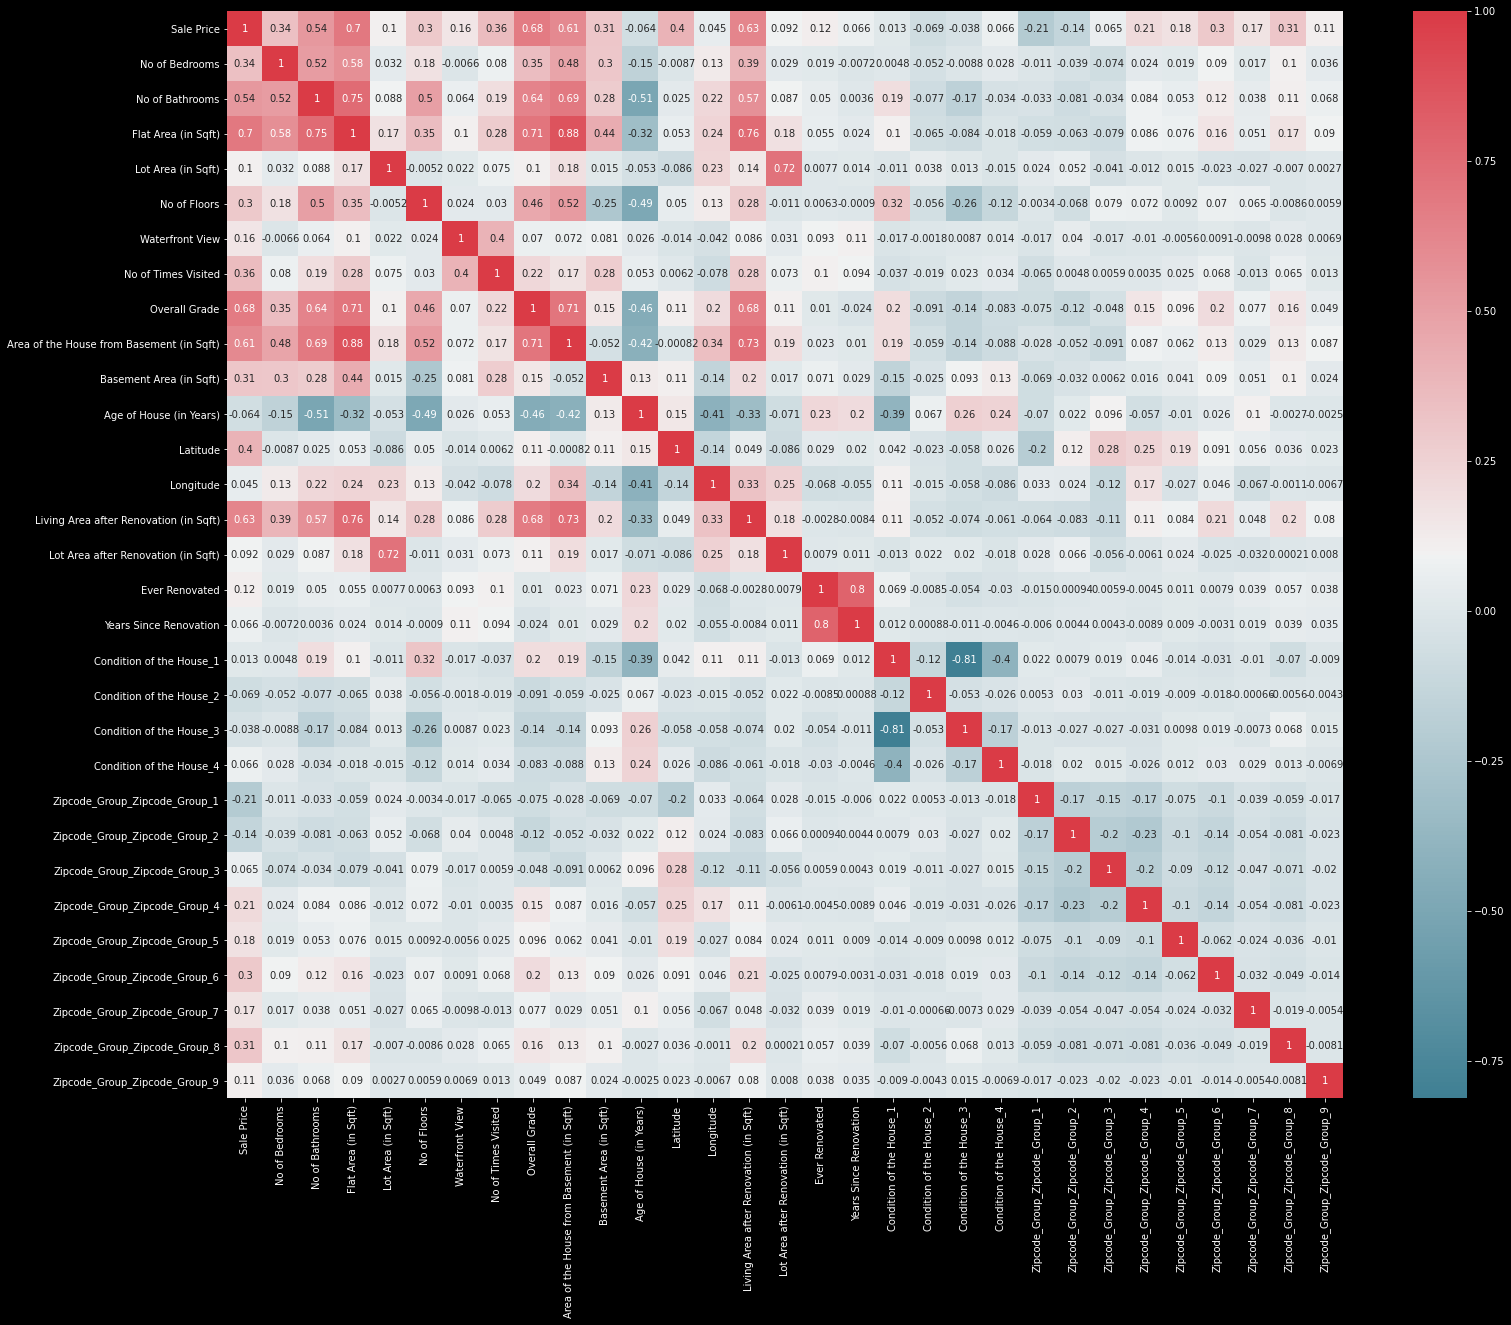

In [16]:
def correlation_heatmap(data):
    _, ax = plt.subplots(figsize = (25, 20))
    colormap= sns.diverging_palette(220, 10, as_cmap = True)
    sns.heatmap(data.corr(), annot=True, cmap = colormap)

correlation_heatmap(data)

In [18]:
k=X.corr()
z = [[str(i),str(j)] for i in k.columns for j in k.columns if (k.loc[i,j]>abs(0.5) and (i!=j))]

In [19]:
z,len(z)

([['No of Bedrooms', 'No of Bathrooms'],
  ['No of Bedrooms', 'Flat Area (in Sqft)'],
  ['No of Bedrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'No of Bedrooms'],
  ['No of Bathrooms', 'Flat Area (in Sqft)'],
  ['No of Bathrooms', 'No of Floors'],
  ['No of Bathrooms', 'Overall Grade'],
  ['No of Bathrooms', 'Area of the House from Basement (in Sqft)'],
  ['No of Bathrooms', 'Living Area after Renovation (in Sqft)'],
  ['Flat Area (in Sqft)', 'No of Bedrooms'],
  ['Flat Area (in Sqft)', 'No of Bathrooms'],
  ['Flat Area (in Sqft)', 'Overall Grade'],
  ['Flat Area (in Sqft)', 'Area of the House from Basement (in Sqft)'],
  ['Flat Area (in Sqft)', 'Living Area after Renovation (in Sqft)'],
  ['Lot Area (in Sqft)', 'Lot Area after Renovation (in Sqft)'],
  ['No of Floors', 'No of Bathrooms'],
  ['No of Floors', 'Area of the House from Basement (in Sqft)'],
  ['Overall Grade', 'No of Bathrooms'],
  ['Overall Grade', 'Flat Area (in Sqft)'],
  ['Overall Grade',

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = X[:]

## Calculating VIF for every column
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF

No of Bedrooms                                 1.744062
No of Bathrooms                                3.446568
Flat Area (in Sqft)                           21.798445
Lot Area (in Sqft)                             6.905227
No of Floors                                   2.441989
Waterfront View                                1.212835
No of Times Visited                            1.417032
Overall Grade                                  3.113877
Area of the House from Basement (in Sqft)     23.584976
Basement Area (in Sqft)                        6.641002
Age of House (in Years)                        2.661722
Latitude                                       2.467248
Longitude                                      1.815369
Living Area after Renovation (in Sqft)         3.001087
Lot Area after Renovation (in Sqft)            6.650825
Ever Renovated                                 3.044133
Years Since Renovation                         2.876512
Condition of the House_1                     166

In [21]:
def MC_remover(data):
  vif = pd.Series([variance_inflation_factor(data.values, i) for i in range(data.shape[1])], index = data.columns)
  if vif.max() > 5:
    print(vif[vif == vif.max()].index[0],'has been removed')
    data = data.drop(columns = [vif[vif == vif.max()].index[0]])
    return data
  else:
    print('No Multicollinearity present anymore')
    return data

In [22]:
for i in range(7):
  vif_data = MC_remover(vif_data)

vif_data.head()

Condition of the House_1 has been removed
Area of the House from Basement (in Sqft) has been removed
Lot Area (in Sqft) has been removed
Flat Area (in Sqft) has been removed
No Multicollinearity present anymore
No Multicollinearity present anymore
No Multicollinearity present anymore


,No of Bedrooms,No of Bathrooms,No of Floors,Waterfront View,No of Times Visited,Overall Grade,Basement Area (in Sqft),Age of House (in Years),Latitude,Longitude,...,Condition of the House_4,Zipcode_Group_Zipcode_Group_1,Zipcode_Group_Zipcode_Group_2,Zipcode_Group_Zipcode_Group_3,Zipcode_Group_Zipcode_Group_4,Zipcode_Group_Zipcode_Group_5,Zipcode_Group_Zipcode_Group_6,Zipcode_Group_Zipcode_Group_7,Zipcode_Group_Zipcode_Group_8,Zipcode_Group_Zipcode_Group_9
0,-0.398647,-1.448931,-0.915604,-0.087181,-0.30579,-0.563993,-0.726332,0.544734,-0.352576,-0.306108,...,-0.292306,-0.350481,-0.482158,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
1,-0.398647,0.176496,0.937193,-0.087181,-0.30579,-0.563993,0.538457,0.680915,1.161645,-0.746519,...,-0.292306,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
2,-1.477788,-1.448931,-0.915604,-0.087181,-0.30579,-1.468566,-0.726332,1.293731,1.283619,-0.135646,...,-0.292306,-0.350481,2.074011,-0.419600,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
3,0.678352,1.149811,-0.915604,-0.087181,-0.30579,-0.563993,1.504500,0.204281,-0.283288,-1.272266,...,3.421068,-0.350481,-0.482158,2.383223,-0.479094,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158
4,-0.398647,-0.148266,-0.915604,-0.087181,-0.30579,0.340581,-0.726332,-0.544715,0.409587,1.199268,...,-0.292306,-0.350481,-0.482158,-0.419600,2.087275,-0.214086,-0.287712,-0.112274,-0.16885,-0.048158


In [23]:
VIF = pd.Series([variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])], index = vif_data.columns)
VIF, len(vif_data.columns)

(No of Bedrooms                            1.510710
 No of Bathrooms                           2.972530
 No of Floors                              2.230555
 Waterfront View                           1.210919
 No of Times Visited                       1.411379
 Overall Grade                             2.700371
 Basement Area (in Sqft)                   1.649707
 Age of House (in Years)                   2.574964
 Latitude                                  2.465853
 Longitude                                 1.776715
 Living Area after Renovation (in Sqft)    2.569633
 Lot Area after Renovation (in Sqft)       1.657713
 Ever Renovated                            3.039216
 Years Since Renovation                    2.873450
 Condition of the House_2                  1.025202
 Condition of the House_3                  1.258980
 Condition of the House_4                  1.204985
 Zipcode_Group_Zipcode_Group_1             1.538462
 Zipcode_Group_Zipcode_Group_2             2.566274
 Zipcode_Gro

In [24]:
X= vif_data[:]

In [25]:
Y =  data['Sale Price']

In [27]:
from sklearn.model_selection import train_test_split
x_train , x_test  , y_train , y_test = train_test_split(X,Y,test_size=0.3,random_state=3)
x_train.shape , y_train.shape , x_test.shape , y_test.shape

((15126, 26), (15126,), (6483, 26), (6483,))

In [28]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [29]:
lr.coef_

array([  7318.11201703,  39228.77238329,  16571.94944649,  10324.48692338,
        29321.55220174,  80685.98694526,   6300.41267261,  38707.87948691,
        22083.44543523, -18665.03408104,  40213.14046732,  15305.61506858,
        14112.73675926, -10024.1623532 ,   -701.53395147,   3340.65862935,
        12504.09582643,  11101.15598126,  33205.84799302,  59750.70086245,
        76810.70425866,  50495.80831368,  70346.85473885,  39433.50547037,
        67864.76277888,  22874.90065842])

In [30]:
predictions = lr.predict(x_test)

In [31]:
lr.score(x_test,y_test)

0.8127004352203143

In [32]:
residuals = predictions - y_test
residual_table = pd.DataFrame({
    'residuals':residuals,
    'predictions':predictions
})
residual_table = residual_table.sort_values(by='predictions')

In [33]:
z = [i for i in range(int(residual_table['predictions'].max()))]
k = [0 for i in range(int(residual_table['predictions'].max()))]

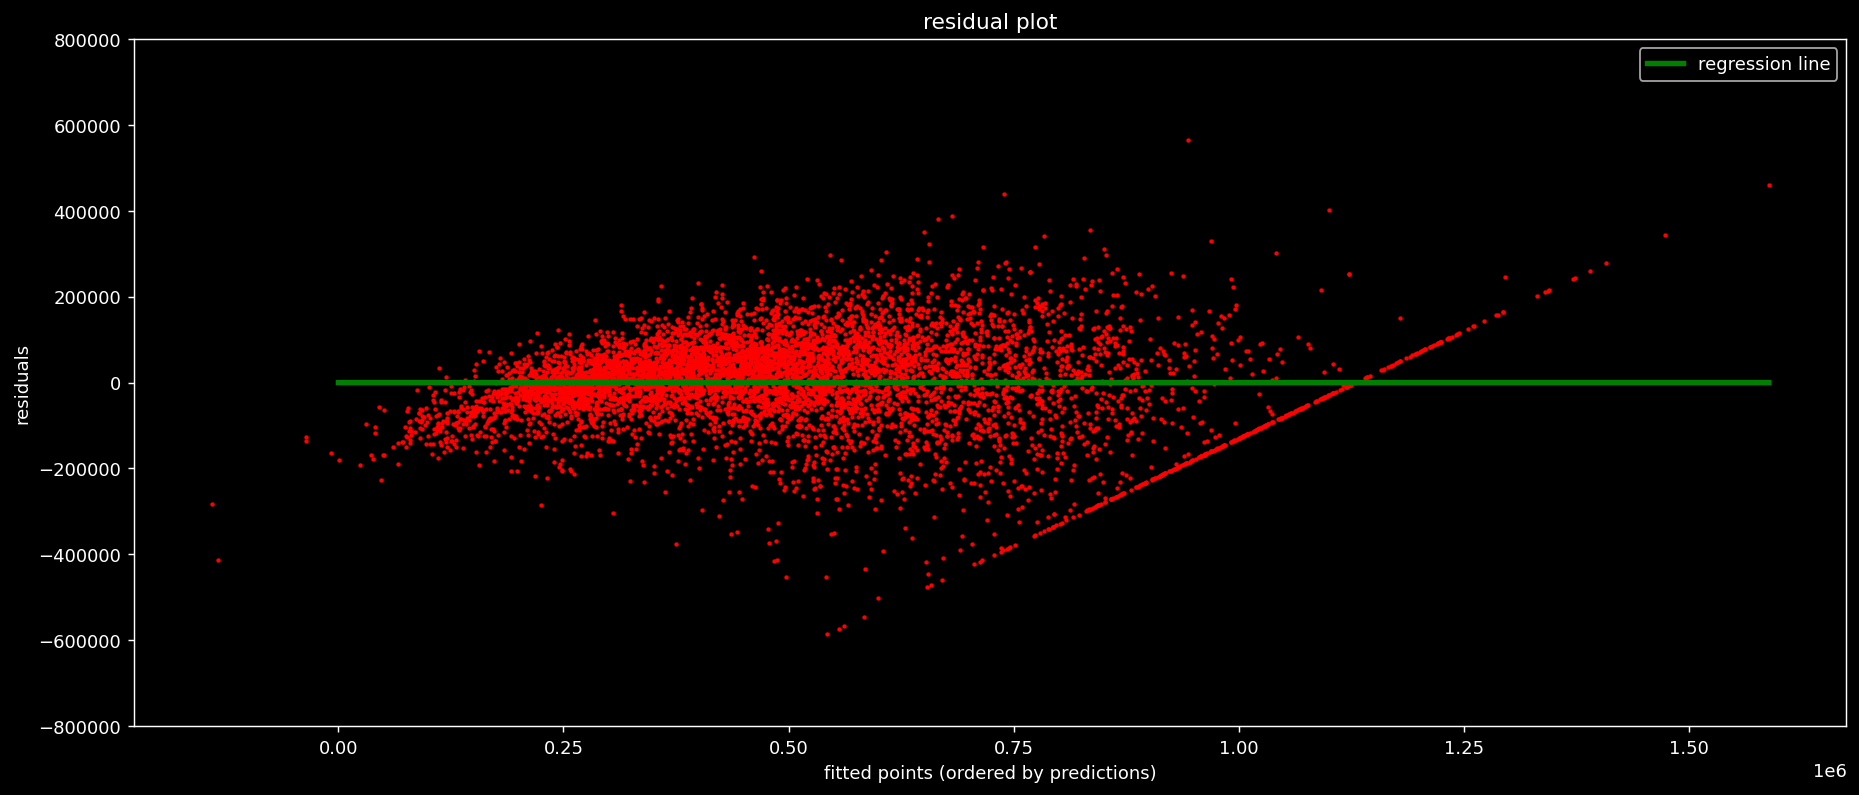

In [34]:
plt.figure(dpi = 130, figsize = (17,7))

plt.scatter( residual_table['predictions'], residual_table['residuals'], color = 'red', s = 2)
plt.plot(z, k, color = 'green', linewidth = 3, label = 'regression line')
plt.ylim(-800000, 800000)
plt.xlabel('fitted points (ordered by predictions)')
plt.ylabel('residuals')
plt.title('residual plot')
plt.legend()
plt.show()

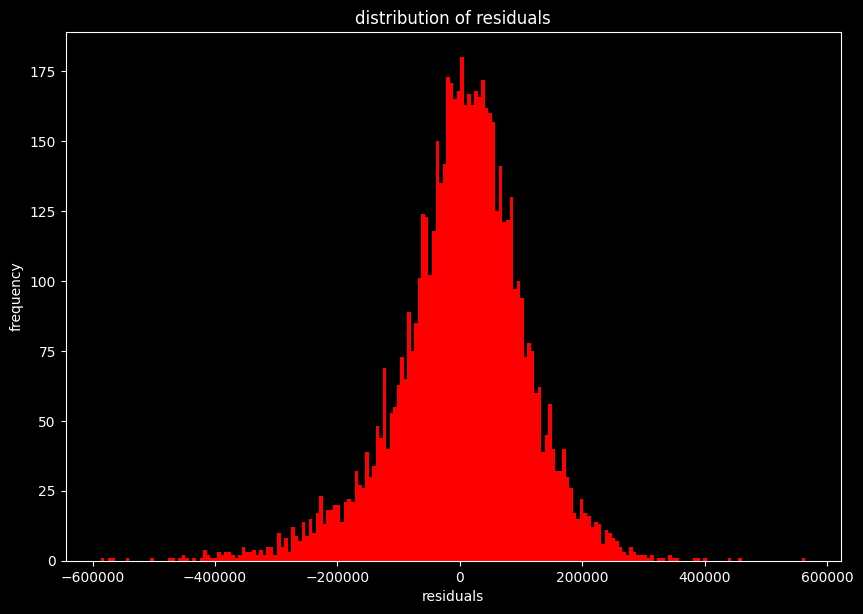

In [35]:
plt.figure(dpi = 100, figsize = (10,7))
plt.hist(residual_table['residuals'], color = 'red', bins = 200)
plt.xlabel('residuals')
plt.ylabel('frequency')
plt.title('distribution of residuals')
plt.show()

In [36]:
coefficients_table = pd.DataFrame({'column': x_train.columns,
                                  'coefficients': lr.coef_})
coefficient_table = coefficients_table.sort_values(by = 'coefficients')


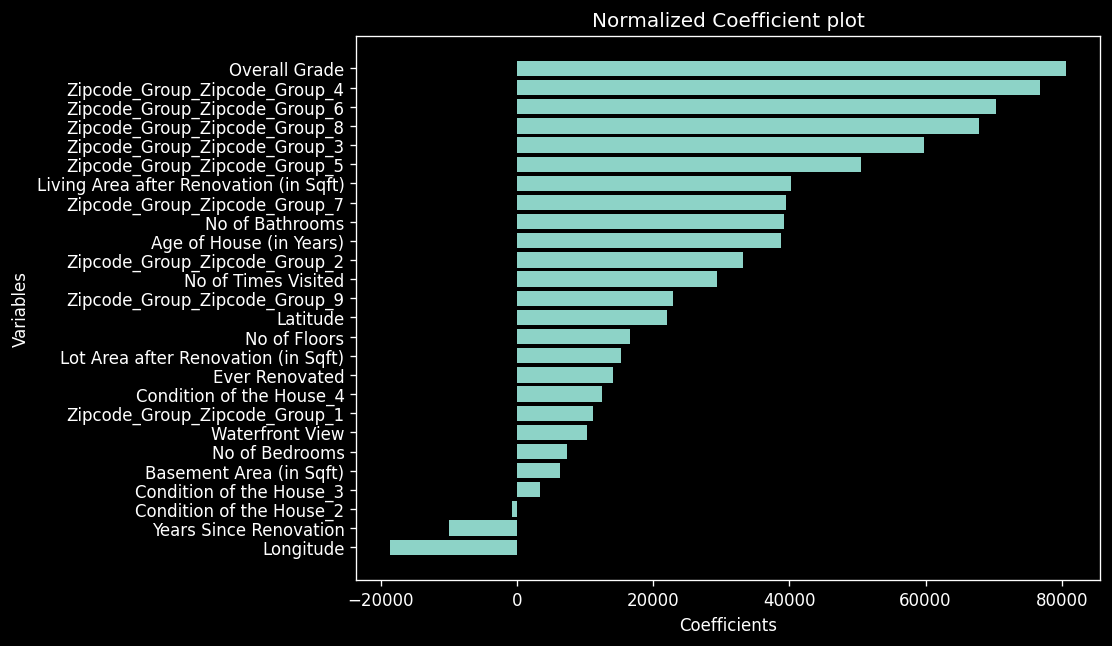

In [37]:
plt.figure(figsize=(8, 6), dpi=120)
x = coefficient_table['column']
y = coefficient_table['coefficients']
plt.barh( x, y)
plt.xlabel( "Coefficients")
plt.ylabel('Variables')
plt.title('Normalized Coefficient plot')
plt.show()